In [8]:
import numpy as np

In [9]:
class Mortgage:
    def __init__(self, r, principal, nperiods):
        self.i = r/12;
        self.P0 = principal
        self.N = nperiods
        self.M = self.yearly_payment();
        
    def yearly_payment(self):
        return (self.P0*self.i*((1+self.i)**self.N)/ ((1+self.i)**self.N-1))
    
    def A(self,n):
        return (self.P0*self.i*(1+self.i)**self.N)/((1+self.i)**self.N-1)-self.R(n)
    
    def p(self, n):
        # return self.P0*(1+self.i)**n - self.M*(((1+self.i)n-1]/self.i)
        return self.P0*(1+self.i)**n-(((1+self.i)**n-1)/self.i)*(self.P0*self.i*(1+self.i)**self.N)/((1+self.i)**self.N-1)
        
    def R(self, n):
        return self.p(n-1)*self.i
    
    def PV(self,n):
        return self.M/(1+self.i)**n
    
class ARMLoan(Mortgage):
    def __init__(self,principal, nperiods,m,r1,r2):
        
        self.morty1p = Mortgage(r1,principal, nperiods);
        self.morty1 = Mortgage(r1, principal - self.morty1p.p(m),m)
        self.morty2 = Mortgage(r2,self.morty1p.p(m),nperiods-m);

In [10]:
import matplotlib.pyplot as plt

class Mortgage:
    def __init__(self, r, principal, nperiods):
        self.i = r/12;
        self.P0 = principal
        self.N = nperiods
        self.M = self.yearly_payment();
        
    def yearly_payment(self):
        return (self.P0*self.i*((1+self.i)**self.N)/ ((1+self.i)**self.N-1))
    
    def A(self,n):
        return (self.P0*self.i*(1+self.i)**self.N)/((1+self.i)**self.N-1)-self.R(n)
    
    def p(self, n):
        # return self.P0*(1+self.i)**n - self.M*(((1+self.i)n-1]/self.i)
        return self.P0*(1+self.i)**n-(((1+self.i)**n-1)/self.i)*(self.P0*self.i*(1+self.i)**self.N)/((1+self.i)**self.N-1)
        
    def R(self, n):
        return self.p(n-1)*self.i
    
    def PV(self,n):
        return self.M/(1+self.i)**n
    
class ARMLoan(Mortgage):
    def __init__(self,principal, nperiods,m,r1,r2):
        
        self.morty1p = Mortgage(r1,principal, nperiods);
        self.morty1 = Mortgage(r1, principal - self.morty1p.p(m),m)
        self.morty2 = Mortgage(r2,self.morty1p.p(m),nperiods-m);
Y=100
m=70
army = ARMLoan(100000,Y,m,0.02,0.04)

As1 = [army.morty1.A(n) for n in range(1,m+1)]
Rs1 = [army.morty1.R(n) for n in range(1,m+1)]
PVs1 = [army.morty1.PV(n) for n in range(1,m+1)]
Ms1 = [army.morty1.A(n) + army.morty1.R(n) for n in range(1,m+1)]

As2 = [army.morty2.A(n) for n in range(1,Y-m+1)]
Rs2 = [army.morty2.R(n) for n in range(1,Y-m+1)]
PVs2 = [army.morty2.PV(n) for n in range(1,Y-m+1)]
Ms2 = [army.morty2.A(n) + army.morty2.R(n) for n in range(1,Y-m+1)]

As = As1 + As2
Rs = Rs1 + Rs2
PVs = PVs1 + PVs2
Ms = Ms1 + Ms2


In [11]:
print(army.morty1.P0)

68232.90725792931


In [12]:
print(army.morty2.P0)

31767.092742070687


In [13]:
print(sum(PVs1)+sum(PVs2))

99999.9999999977


In [14]:
print(army.morty2.P0+army.morty1.P0)

100000.0


The total interest payments were 5782.104365704474
The total amortization payments were 99999.99999999772
The total payments(A+R) was 105782.10436570205
Present value sum PVs: 99999.99999999767


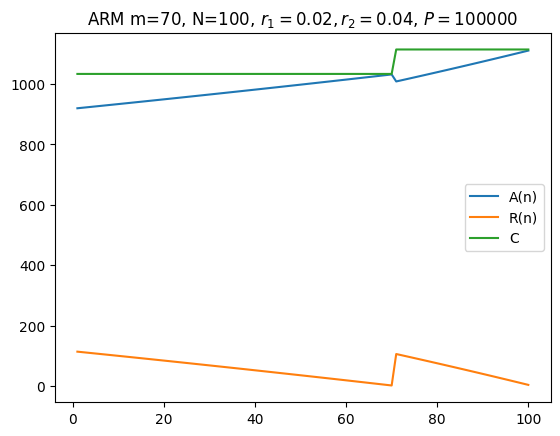

In [19]:
print("The total interest payments were "+ str(sum(Rs)))
print("The total amortization payments were " + str(sum(As)))
print("The total payments(A+R) was " + str(sum(Ms)))
print("Present value sum PVs: " + str(sum(PVs)))
plt.plot(range(1,Y+1),As, label="A(n)")
plt.plot(range(1,Y+1),Rs, label="R(n)")
plt.plot(range(1,Y+1),Ms, label="C")
plt.legend()
plt.title("ARM m=70, N=100, $r_1=0.02, r_2 = 0.04$, $P=100000$")
plt.savefig("ARM.png")

In [85]:
sum(As)

101031.81341143535

In [234]:
import matplotlib.pyplot as plt
Y = 60
morty = Mortgage(0.02, 100000.0, Y)
As = [morty.A(n) for n in range(1,Y+1)]
Rs = [morty.R(n) for n in range(1,Y+1)]
PVs = [morty.PV(n) for n in range(1,Y+1)]
Ms = [morty.A(n) + morty.R(n) for n in range(1,Y+1)]
print("The total interest payments were "+ str(sum(Rs)))
print("The total amortization payments were " + str(sum(As)))
print("The total payments(A+R) was " + str(sum(Ms)))
print("Total present value sum(PV): " + str(sum(PVs)))

The total interest payments were 5166.56031946629
The total amortization payments were 99999.99999999767
The total payments(A+R) was 105166.56031946391
Total present value sum(PV): 99999.99999999766


Text(0.5, 1.0, 'Payments for  $i=0.02, P=100000, N=100$')

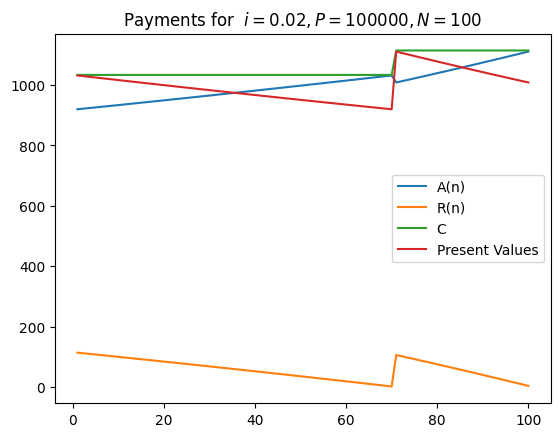

In [20]:
plt.plot(range(1,Y+1),As, label="A(n)")
plt.plot(range(1,Y+1),Rs, label="R(n)")
plt.plot(range(1,Y+1),Ms, label="C")
plt.plot(range(1,Y+1),PVs, label="Present Values")
plt.legend()
plt.title("Payments for  $i="+str(0.02)+", P=100000, N=100$")

[1749.8595727032273,
 1746.9479927153682,
 1744.0412572865573,
 1741.1393583559639,
 1738.2422878761702,
 1735.3500378131482,
 1732.4626001462377,
 1729.5799668681243,
 1726.7021299848163,
 1723.8290815156233,
 1720.9608134931348,
 1718.097317963196,
 1715.2385869848877,
 1712.3846126305036,
 1709.5353869855278,
 1706.690902148613,
 1703.8511502315605,
 1701.016123359295,
 1698.1858136698452,
 1695.360213314321,
 1692.5393144568932,
 1689.7231092747681,
 1686.9115899581714,
 1684.1047487103208,
 1681.3025777474083,
 1678.5050692985774,
 1675.7122156059006,
 1672.92400892436,
 1670.1404415218237,
 1667.3615056790254,
 1664.5871936895426,
 1661.8174978597763,
 1659.052410508928,
 1656.2919239689797,
 1653.5360305846716,
 1650.7847227134826,
 1648.0379927256063,
 1645.2958330039332,
 1642.5582359440266,
 1639.8251939541026,
 1637.0966994550108,
 1634.3727448802106,
 1631.653322675751,
 1628.9384253002504,
 1626.2280452248756,
 1623.52217493332,
 1620.8208069217837,
 1618.123933698952,
 16

The amortization and interest curves will sometimes intersect and sometimes not. It remains to be determined under what conditions the curves will 